In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/1y/xsmfy4rd3_qcqffqthwtp0th0000gn/T/ipykernel_85673/1185836227.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
studis = pd.read_excel('data/list_studis.xlsx')

In [3]:
studis.head()

,Unnamed: 0,id_uni,id_fak,id_stud,name_stud,kind_stud,time_stud,credits,total_stds,total_starter_year,total_grads_year,tframe_grad,ptod_ratio,exstd_ratio,forgeign_lang_ratio,mandatory_exchange,foreign_conn,access
0,0.0,2,1200001,36344,BIOCHEMISTRY AND BIOPHYSICS (M.SC.),"konsekutiver Masterstudiengang, Präsenzstudium...",4 Semester,120,93,35,27,"53,7 %",Zulassungsmodus,NaN,NaN,NaN,NaN,NaN
1,1.0,2,420102,20655,BIOLOGIE (B.SC.),"Ein-Fach-Bachelorstudiengang, vollzeit",6 Semester,180,466,156,102,"88,2 %",39:61 [%m:%w],NaN,NaN,NaN,NaN,NaN
2,2.0,2,420102,27525,BIOLOGIE (M.SC.),"konsekutiver Masterstudiengang, vollzeit",4 Semester,120,317,100,91,NaN,39:61 [%m:%w],"5,0 %","100,0 %","nicht obligatorisch, aber Credits anrechenbar",NaN,NaN
3,3.0,2,420102,40331,NEUROSCIENCE (M.SC.),"konsekutiver Masterstudiengang, vollzeit",4 Semester,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2,200001,21461,CHEMIE (B.SC.),"Ein-Fach-Bachelorstudiengang, Präsenzstudium, ...",6 Semester,180,280,99,55,NaN,66:34 [%m:%w],NaN,NaN,NaN,NaN,NaN


In [5]:
studis.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [6]:
studis['name_stud'] = studis['name_stud'].apply(lambda x: x.title())
studis.head()

,id_uni,id_fak,id_stud,name_stud,kind_stud,time_stud,credits,total_stds,total_starter_year,total_grads_year,tframe_grad,ptod_ratio,exstd_ratio,forgeign_lang_ratio,mandatory_exchange,foreign_conn,access
0,2,1200001,36344,Biochemistry And Biophysics (M.Sc.),"konsekutiver Masterstudiengang, Präsenzstudium...",4 Semester,120,93,35,27,"53,7 %",Zulassungsmodus,NaN,NaN,NaN,NaN,NaN
1,2,420102,20655,Biologie (B.Sc.),"Ein-Fach-Bachelorstudiengang, vollzeit",6 Semester,180,466,156,102,"88,2 %",39:61 [%m:%w],NaN,NaN,NaN,NaN,NaN
2,2,420102,27525,Biologie (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4 Semester,120,317,100,91,NaN,39:61 [%m:%w],"5,0 %","100,0 %","nicht obligatorisch, aber Credits anrechenbar",NaN,NaN
3,2,420102,40331,Neuroscience (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4 Semester,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,200001,21461,Chemie (B.Sc.),"Ein-Fach-Bachelorstudiengang, Präsenzstudium, ...",6 Semester,180,280,99,55,NaN,66:34 [%m:%w],NaN,NaN,NaN,NaN,NaN


In [15]:
# 262 verschiedene Studiengaenge
display(studis['kind_stud'].nunique())

display(studis['kind_stud'].value_counts())
#Titel kuerzen? Bachelor und Master groupen?
display(studis['kind_stud'].unique())

262

Präsenzstudiengang, Vollzeit                                                                                                                                                    1713
konsekutiver Masterstudiengang, Präsenzstudium, vollzeit                                                                                                                        683 
Präsenzstudiengang, Vollzeit, auch in Teilzeit studierbar                                                                                                                       654 
Vollzeit-Präsenzstudiengang                                                                                                                                                     652 
Ein-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit                                                                                                                          481 
Präsenzstudiengang, Vollzeit, fachübergreifend                                                 

array(['konsekutiver Masterstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich',
       'Ein-Fach-Bachelorstudiengang, vollzeit',
       'konsekutiver Masterstudiengang, vollzeit',
       'Ein-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich',
       'Zwei-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich',
       'Präsenzstudiengang, Vollzeit',
       'Ein-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit',
       'Polyvalenter Bachelorstudiengang mit Lehramtsoption, Präsenzstudium, vollzeit',
       'konsekutiver Masterstudiengang, Präsenzstudium, vollzeit',
       'Präsenzstudiengang, Vollzeit, fachübergreifend',
       'Fernstudiengang, berufsbegleitend', 'Vollzeit-Präsenzstudiengang',
       'Vollzeit-Präsenzstudiengang für im Ausland graduierte Juristen',
       'Regelstudienzeit',
       'Zwei-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit',
       'Staatsexamen, Präsenzstudium, vollzeit',
       'Master of Education

In [18]:
display(studis['time_stud'].unique())

display(studis['time_stud'].value_counts())

array([ 4.,  6.,  5.,  9., nan,  3.,  2., 10.,  8., 11.,  7., 12., 20.])

4.0     2374
6.0     1737
7.0     829 
3.0     659 
8.0     176 
5.0     95  
10.0    82  
9.0     80  
2.0     60  
11.0    7   
12.0    6   
20.0    3   
Name: time_stud, dtype: int64

In [19]:
studis['time_stud'] = pd.to_numeric(studis['time_stud'].apply(lambda x: str(x).replace(' Semester', '').replace('nan', '').replace('keine Angaben', '').replace('keine Angabe', '').replace('Credits insgesamt', '')), downcast = 'signed')


In [20]:
studis.rename(columns = {'time_stud' : 'semester'}, inplace = True)

In [21]:
#klappt
int(studis['semester'][1])

6

In [22]:
#klappt nicht???
def augment(x):
    try:
        return int(x)
    except:
        return np.nan
studis['semester'].apply(lambda x: augment(x))

0       4.0 
1       6.0 
2       4.0 
3       4.0 
4       6.0 
5       6.0 
6       6.0 
7       4.0 
8       4.0 
9       4.0 
10      6.0 
11      4.0 
12      6.0 
13      6.0 
14      4.0 
15      6.0 
16      4.0 
17      6.0 
18      6.0 
19      6.0 
20      4.0 
21      4.0 
22      4.0 
23      4.0 
24      4.0 
25      4.0 
26      6.0 
27      6.0 
28      4.0 
29      6.0 
30      6.0 
31      4.0 
32      4.0 
33      4.0 
34      5.0 
35      4.0 
36      9.0 
37      4.0 
38     NaN  
39      3.0 
40      6.0 
41      6.0 
42      4.0 
43     NaN  
44     NaN  
45      4.0 
46      6.0 
47      6.0 
48      4.0 
49      4.0 
50      6.0 
51      4.0 
52      4.0 
53      6.0 
54      6.0 
55      4.0 
56      4.0 
57      6.0 
58      6.0 
59      4.0 
60      6.0 
61      4.0 
62      6.0 
63      6.0 
64      4.0 
65      6.0 
66      4.0 
67      6.0 
68      4.0 
69      6.0 
70      6.0 
71      6.0 
72      4.0 
73      6.0 
74      4.0 
75      6.0 
76      6.0 

In [24]:
display(studis['semester'].unique())

array([ 4.,  6.,  5.,  9., nan,  3.,  2., 10.,  8., 11.,  7., 12., 20.])

In [25]:
studis['semester'].isnull().sum()

389

<AxesSubplot:>

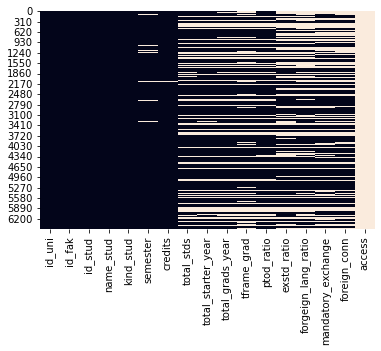

In [26]:
sns.heatmap(studis.isnull(), cbar=False)

In [27]:
studis.rename(columns = {'tframe_grad' : 'intime_grad_perc'}, inplace = True)

In [28]:
studis['intime_grad_perc'].unique()

array(['53,7 %', '88,2 %', nan, '98,7 %', '67,6 %', '73,9 %', '<10',
       '10,9 %', '95,3 %',
       '<10 Abschlüsse / Jahr in einem der Beobachtungsjahre', '54,5 %',
       '13,6 %', '81,7 %', '74,4 %', '85,1 %', '94,8 %', '21,3 %',
       '92,4 %', '29,5 %', '79,3 %', '87,9 %', '98,1 %', '68,6 %',
       '71,4 %', 'nicht ausgewiesen, da <10 Absolventen/Jahr', '97,7 %',
       '50,9 %', '91,7 %', '94,3 %', '57,6 %', '78,5 %', '15,3 %',
       '54,8 %', '69,0 %', '76,6 %', '36,0 %', '48,9 %', '44,8 %',
       '65,4 %', '96,8 %', '47,0 %', '30,4 %', '82,3 %', '53,2 %',
       '77,8 %', '89,3 %', 'zum WS 2017/18 noch keine Absolventen',
       '78,4 %', '100,0 %', '36,4 %', 'keine Angaben', '95,9 %',
       'nicht ausgewiesen, da nicht durchgängig mind. 10 Absolventen/Jahr',
       '65,1 %', '54,9 %', '77,5 %', '91,4 %', '76,8 %', '68,9 %',
       '95,1 %', '91,5 %', '74,6 %', '73,8 %', '41,9 %', '52,4 %',
       '69,7 %', '75,9 %', '8,3 %', '38,1 %', '58,7 %', '29,9 %',
       '67,3 %

In [ ]:
studis['intime_grad_perc'].head(10)

In [29]:
studis['intime_grad_perc'] = studis['intime_grad_perc'].apply(lambda x : str(x).replace(' %', '').replace(',', '.'))

In [30]:
studis['intime_grad_perc'].value_counts()

nan                                                                  2398
nicht ausgewiesen. da <10 Absolventen/Jahr                           347 
keine Angaben                                                        327 
<10                                                                  252 
zum WS 2017/18 noch keine Absolventen                                153 
im Beobachtungszeitraum noch keine Abschlüsse                        117 
100.0                                                                89  
nicht ausgewiesen. da nicht durchgängig mind. 10 Absolventen/Jahr    79  
nicht gerankt. da <10 Absolventen / Jahr                             73  
<10 Abschlüsse / Jahr in einem der Beobachtungsjahre                 70  
nicht durchgängig mind. 10 Absolventen pro Jahr                      58  
im Erhebungszeitraum noch keine Absolventen                          52  
66.7                                                                 36  
50.0                                  

In [73]:
def to_num_or_null(x):
    try:
        return pd.to_numeric(x)
    except:
        return np.nan
studis['intime_grad_perc'] = studis['intime_grad_perc'].apply(lambda x : to_num_or_null(x)/100)

In [74]:
studis['intime_grad_perc'].isnull().sum()

3970

In [75]:
studis['intime_grad_perc'].head()

0    0.537
1    0.882
2   NaN   
3   NaN   
4   NaN   
Name: intime_grad_perc, dtype: float64

In [33]:
studis.rename(columns = {'ptod_ratio' : 'm2w_ratio'}, inplace = True)

In [34]:
studis['m2w_ratio'].unique()

array(['Zulassungsmodus', '39:61 [%m:%w]', nan, '66:34 [%m:%w]',
       '53:47 [%m:%w]', '36:64 [%m:%w]', '68:32 [%m:%w]', '55:45 [%m:%w]',
       '59:41 [%m:%w]', 'Anteil ausländischer Studierender',
       '49:51 [%m:%w]', '51:49 [%m:%w]', '32:68 [%m:%w]', '63:37 [%m:%w]',
       '60:40 [%m:%w]', '86:14 [%m:%w]', '84:16 [%m:%w]', '85:15 [%m:%w]',
       '77:23 [%m:%w]', '91:9 [%m:%w]', '46:54 [%m:%w]', '67:33 [%m:%w]',
       '54:46 [%m:%w]', '69:31 [%m:%w]', '30:70 [%m:%w]', '31:69 [%m:%w]',
       '45:55 [%m:%w]', '73:27 [%m:%w]', '79:21 [%m:%w]', '82:18 [%m:%w]',
       '65:35 [%m:%w]', '20:80 [%m:%w]', '61:39 [%m:%w]',
       'Gemeinsames Studienprogramm mit ausländischer Hochschule',
       '70:30 [%m:%w]', '57:43 [%m:%w]', '87:13 [%m:%w]', '41:59 [%m:%w]',
       '78:22 [%m:%w]', '47:53 [%m:%w]', '74:26 [%m:%w]', '15:85 [%m:%w]',
       '10:90 [%m:%w]', '62:38 [%m:%w]', '40:60 [%m:%w]', '27:73 [%m:%w]',
       '38:62 [%m:%w]', '72:28 [%m:%w]', '17:83 [%m:%w]', '44:56 [%m:%w]',


In [35]:
studis['m2w_ratio'] = studis['m2w_ratio'].apply(lambda x: str(x).replace(' [%m:%w]', '').replace('Zulassungsmodus', '').replace('Anteil ausländischer Studierender', '').replace('Gemeinsames Studienprogramm mit ausländischer Hochschule', '').replace('Anteil fremdsprachiger Lehrveranstaltungen', ''))

In [36]:
studis['m2w_ratio']

0            
1       39:61
2       39:61
3       nan  
4       66:34
5       53:47
6       36:64
7       68:32
8       55:45
9       59:41
10           
11           
12      49:51
13      51:49
14      32:68
15      63:37
16      60:40
17      nan  
18      nan  
19      nan  
20      nan  
21      nan  
22      nan  
23      nan  
24      nan  
25      nan  
26      86:14
27      84:16
28      85:15
29      77:23
30      91:9 
31      nan  
32      nan  
33      nan  
34      nan  
35      nan  
36      46:54
37           
38      nan  
39           
40      67:33
41      54:46
42      69:31
43      30:70
44      31:69
45      45:55
46      73:27
47      79:21
48      82:18
49      65:35
50      20:80
51      nan  
52      nan  
53      61:39
54      55:45
55      nan  
56           
57           
58           
59           
60           
61           
62      31:69
63      nan  
64      nan  
65      61:39
66      70:30
67           
68      nan  
69      nan  
70           
71    

In [37]:
def to_null(x):
    if x == '' or x == 'nan':
        return np.nan
    else:
        return x
studis['m2w_ratio'] = studis['m2w_ratio'].apply(lambda x: to_null(x))

In [64]:
#display(str(studis['m2w_ratio'][0]
studis['men_perc'].isnull()
#display(str(studis['women_perc'][0]))

0       True 
1       False
2       False
3       True 
4       False
5       False
6       False
7       False
8       False
9       False
10      True 
11      True 
12      False
13      False
14      False
15      False
16      False
17      True 
18      True 
19      True 
20      True 
21      True 
22      True 
23      True 
24      True 
25      True 
26      False
27      False
28      False
29      False
30      False
31      True 
32      True 
33      True 
34      True 
35      True 
36      False
37      True 
38      True 
39      True 
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      True 
52      True 
53      False
54      False
55      True 
56      True 
57      True 
58      True 
59      True 
60      True 
61      True 
62      False
63      True 
64      True 
65      False
66      False
67      True 
68      True 
69      True 
70      True 
71    

In [89]:
studis['men_perc'] = studis['m2w_ratio'].apply(lambda x: float(str(x).split(':')[0])/100.0)
studis['women_perc'] = studis['m2w_ratio'].apply(lambda x: float(str(x).rsplit(':')[-1])/100.0)
studis.drop('m2w_ratio', axis = 1, inplace = True)

In [65]:
studis.head()

,id_uni,id_fak,id_stud,name_stud,kind_stud,semester,credits,total_stds,total_starter_year,total_grads_year,intime_grad_perc,m2w_ratio,exstd_ratio,forgeign_lang_ratio,mandatory_exchange,foreign_conn,access,men_perc,women_perc
0,2,1200001,36344,Biochemistry And Biophysics (M.Sc.),"konsekutiver Masterstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich",4.0,120,93,35,27,53.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,420102,20655,Biologie (B.Sc.),"Ein-Fach-Bachelorstudiengang, vollzeit",6.0,180,466,156,102,88.2,39:61,NaN,NaN,NaN,NaN,NaN,0.39,0.61
2,2,420102,27525,Biologie (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4.0,120,317,100,91,NaN,39:61,"5,0 %","100,0 %","nicht obligatorisch, aber Credits anrechenbar",NaN,NaN,0.39,0.61
3,2,420102,40331,Neuroscience (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4.0,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,200001,21461,Chemie (B.Sc.),"Ein-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich",6.0,180,280,99,55,NaN,66:34,NaN,NaN,NaN,NaN,NaN,0.66,0.34


In [66]:
studis.rename(columns = {'exstd_ratio' : 'exstd_perc'}, inplace = True)

In [67]:
studis['exstd_perc'].unique()

array([nan, '5,0 %', '1,0 %', '2,0 %', '4,0 %', '35,0 %', '69,0 %',
       '73,0 %', 'Obligatorischer Auslandsaufenthalt', '78,0 %', '81,0 %',
       '80,0 %', '85,0 %', '56,0 %', '7,0 %', '3,0 %', '11,0 %', '13,0 %',
       '9,0 %', '16,0 %', '32,0 %', '0,0 %', 'Zulassungsmodus', '8,0 %',
       '22,0 %', '6,0 %', '79,0 %', '10,0 %',
       'Anteil fremdsprachiger Lehrveranstaltungen', '21,0 %', '34,0 %',
       '29,0 %', '49,0 %', '20,0 %', '14,0 %', '12,0 %', '28,0 %',
       '17,0 %', '47,0 %', '62,0 %', '27,0 %', '59,0 %', '15,0 %',
       '52,0 %', '31,0 %', '33,0 %', '18,0 %', '25,0 %', '38,0 %',
       '41,0 %', '91,0 %', '94,0 %', '97,0 %', '92,0 %', '99,0 %',
       '100,0 %', '23,0 %', '98,0 %', '46,0 %', '63,0 %', '19,0 %',
       '45,0 %', '40,0 %', '26,0 %', '67,0 %', '64,0 %', '24,0 %',
       '37,0 %', '68,0 %', '30,0 %', '50,0 %', '58,0 %', '93,0 %',
       '48,0 %', '77,0 %', '57,0 %', '60,0 %', '43,0 %', '96,0 %',
       '53,0 %', '95,0 %', '70,0 %', '51,0 %', '55,0 

In [ ]:
studis['exstd_perc']

In [68]:
studis['exstd_perc'] = studis['exstd_perc'].apply(lambda x: str(x).replace(',','.').replace(' %', ''))

In [71]:
studis['exstd_perc'] = studis['exstd_perc'].apply(lambda x: to_num_or_null(x)/100)

In [72]:
studis.head()

,id_uni,id_fak,id_stud,name_stud,kind_stud,semester,credits,total_stds,total_starter_year,total_grads_year,intime_grad_perc,m2w_ratio,exstd_perc,forgeign_lang_ratio,mandatory_exchange,foreign_conn,access,men_perc,women_perc
0,2,1200001,36344,Biochemistry And Biophysics (M.Sc.),"konsekutiver Masterstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich",4.0,120,93,35,27,53.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,420102,20655,Biologie (B.Sc.),"Ein-Fach-Bachelorstudiengang, vollzeit",6.0,180,466,156,102,88.2,39:61,NaN,NaN,NaN,NaN,NaN,0.39,0.61
2,2,420102,27525,Biologie (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4.0,120,317,100,91,NaN,39:61,0.05,"100,0 %","nicht obligatorisch, aber Credits anrechenbar",NaN,NaN,0.39,0.61
3,2,420102,40331,Neuroscience (M.Sc.),"konsekutiver Masterstudiengang, vollzeit",4.0,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,200001,21461,Chemie (B.Sc.),"Ein-Fach-Bachelorstudiengang, Präsenzstudium, vollzeit, auch teilzeit möglich",6.0,180,280,99,55,NaN,66:34,NaN,NaN,NaN,NaN,NaN,0.66,0.34


In [76]:
studis.rename(columns = {'forgeign_lang_ratio' : 'foreign_lang_perc'}, inplace = True)

In [77]:
studis['foreign_lang_perc'].unique()

array([nan, '100,0 %', '0,0 %', '10,0 %',
       'Obligatorischer Auslandsaufenthalt', '42,0 %', '5,0 %', '15,0 %',
       '30,0 %', '80,0 %', '50,0 %', '85,0 %', '2,0 %', '37,8 %',
       '25,0 %', '40,0 %', '27,0 %', '23,0 %', '3,3 %', '33,0 %',
       '63,3 %', '15,2 %', '55,0 %', '17,5 %', '16,0 %', '21,0 %',
       '17,0 %', '60,0 %', '52,0 %', '72,0 %',
       'Anteil fremdsprachiger Arbeitsgruppen', '11,0 %', '63,0 %',
       '69,0 %', '20,0 %', '8,0 %', '5,3 %', '66,0 %', '87,0 %', '70,0 %',
       '27,1 %', '90,0 %', '49,2 %', '18,0 %', '14,0 %', '22,0 %',
       '58,3 %', '30,6 %', '56,7 %', '36,0 %', '45,0 %', '19,0 %',
       '56,0 %', '35,0 %', '75,0 %', '12,0 %', '6,0 %', '3,0 %', '13,0 %',
       '4,0 %', '47,0 %', '32,0 %', '57,0 %', '7,0 %', '38,0 %', '65,0 %',
       '67,0 %', '37,0 %', 'keine Angabe', '28,5 %', '2,5 %', '95,0 %',
       '44,0 %',
       'Gemeinsames Studienprogramm mit ausländischer Hochschule',
       '1,5 %', '51,0 %', '28,8 %', '0,6 %', '46,7 %', 

In [78]:
studis['foreign_lang_perc'] = studis['foreign_lang_perc'].apply(lambda x: str(x).replace(',','.').replace(' %', '').replace(' *', ''))

In [79]:
studis['foreign_lang_perc'] = studis['foreign_lang_perc'].apply(lambda x: to_num_or_null(x)/100)

In [80]:
studis['foreign_lang_perc'].head()

0   NaN 
1   NaN 
2    1.0
3   NaN 
4   NaN 
Name: foreign_lang_perc, dtype: float64

In [81]:
studis['mandatory_exchange'] = studis['mandatory_exchange'].apply(lambda x: str(x))

In [83]:
studis['mandatory_exchange'].unique()

array(['nan', 'nicht obligatorisch, aber Credits anrechenbar',
       'keine Angabe', 'nein, aber Credits anrechenbar',
       'kein Auslandsaufenthalt vorgesehen',
       'Gemeinsames Studienprogramm mit ausländischer Hochschule',
       'nicht obligatorisch; Credits anrechenbar', 'nein',
       'ja, beim Abschluss eines "joint programme"',
       'obligatorisch fuer den Abschluss eines joint programme',
       'obligatorisch',
       'obligatorisch beim Abschluss eines "joint programmes"',
       'Zulassungsmodus', 'Auslandsaufenthalt möglich', 'ja'],
      dtype=object)

In [84]:
def obligatory(x):
    if x.find('nicht') > -1 or x.find('nein') > -1 or x.find('kein Auslandsaufenthalt') > -1 or x.find('möglich') > -1:
        return 'nein'
    elif x.find('joint') > -1 or x.find('ausländisch') > -1:
        return 'joint programme'
    elif x.find('obligatorisch') > -1 or x.find('ja') > -1:
        return 'ja'
    else:
        return np.nan
studis['mandatory_exchange'] = studis['mandatory_exchange'].apply(lambda x: obligatory(x))

In [85]:
studis['mandatory_exchange'].unique()

array([nan, 'nein', 'joint programme', 'ja'], dtype=object)

In [86]:
studis['mandatory_exchange'].value_counts()

nein               3036
joint programme    276 
ja                 253 
Name: mandatory_exchange, dtype: int64

In [87]:
studis['mandatory_exchange'].isnull().sum()

2932

In [96]:
studis.drop('foreign_conn', axis = 1, inplace = True)


In [94]:
studis.drop('access', axis = 1, inplace = True)